In [70]:
import sys

import numpy as np
from matplotlib import pyplot as plt

sys.path.append('..')
from higgs_inference.various.utils import format_number

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [57]:
thetas = np.load('../data/thetas/thetas_parameterized.npy')

# Plot function

In [68]:
def plot_neyman_distributions(filename, folder='parameterized', n_bins=51):
    
    thetas_plot = [0,422,9,16]
    thetas_labels = ['SM', 'T', 'NT', 'X']
    
    distributions = np.load('../results/' + folder
                           +'/neyman/neyman_llr_vs_sm_distributions_'
                           + filename + '.npy')
    observeds = np.load('../results/' + folder
                           +'/neyman/neyman_llr_vs_sm_observeds_'
                           + filename + '.npy')
    p_values = np.load('../results/' + folder
                      + '/p_values_ratiotosm_' + filename + '.npy')
    
    plt.figure(figsize=(8,8))
    
    for i, (t, label) in enumerate(zip(thetas_plot, thetas_labels)):
        
        xmin = min(np.percentile(distributions[t], 1.), np.percentile(observeds[t], 1.)) - 5.
        xmax = max(np.percentile(distributions[t], 99.), np.percentile(observeds[t], 99.)) + 5.
        
        plt.subplot(2, 2, i+1)
        plt.hist(distributions[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', alpha=0.2)
        plt.hist(observeds[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', alpha=0.2)
        plt.hist(distributions[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', histtype='step')
        plt.hist(observeds[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', histtype='step')
        
        plt.plot([], [], '-', c='C0', label=r'$p(q(\theta_{' + label + r'}) | \theta_{' + label + r'})$')
        plt.plot([], [], '-', c='C1', label=r'$p(q(\theta_{' + label + r'}) | \theta_{SM})$')
        plt.plot([], [], ' ', label=r'$p = ' + format_number(p_values[t]) + '$')
        plt.legend()
        
        plt.xlabel(r'$q(\theta_{' + label + r'})$')
        plt.ylabel(r'$p(q(\theta_{' + label + r'}))$')
        plt.xlim(xmin, xmax)
        plt.ylim(0., None)

    plt.tight_layout()
    plt.savefig('../figures/neyman/neyman_distribution_' + filename + '.pdf')

# Go

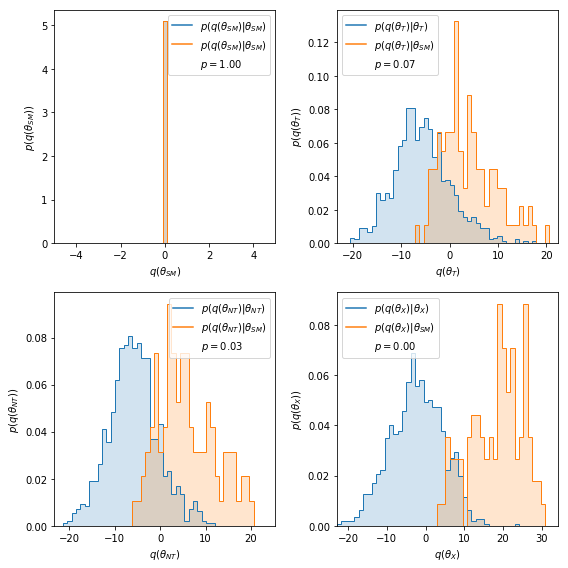

In [69]:
plot_neyman_distributions('regression', 'point_by_point')

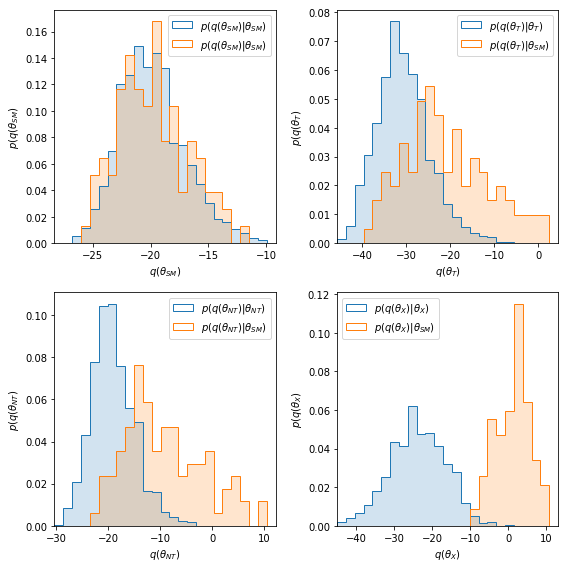

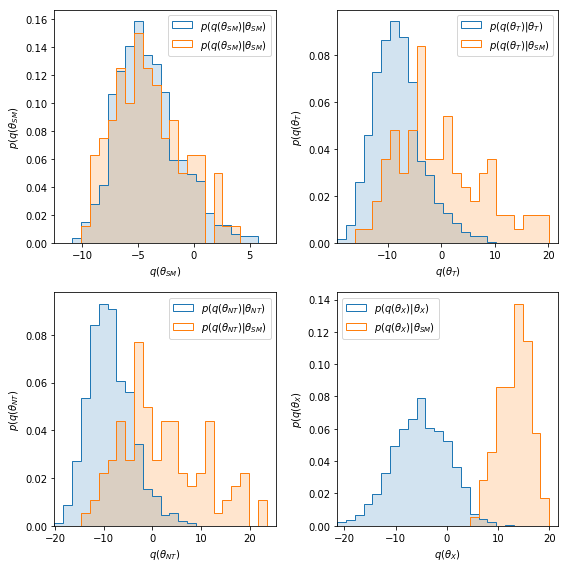

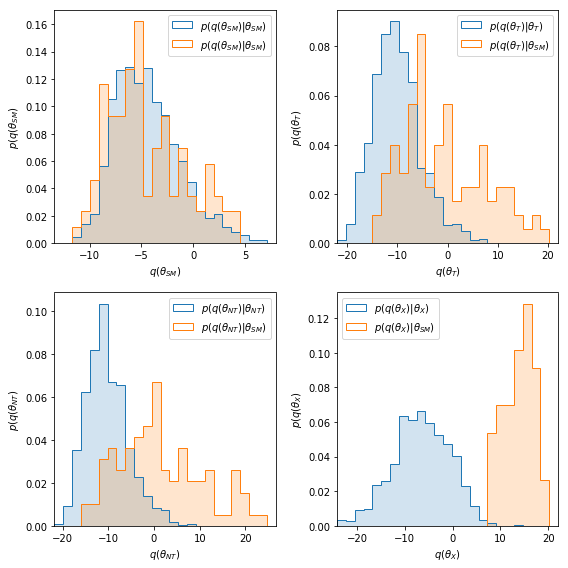

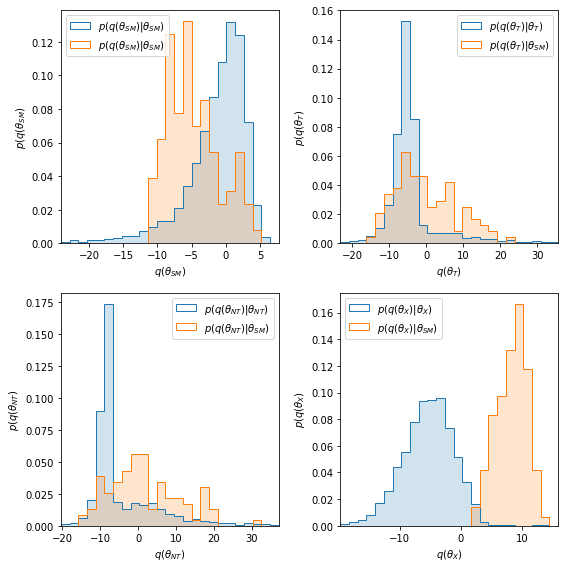

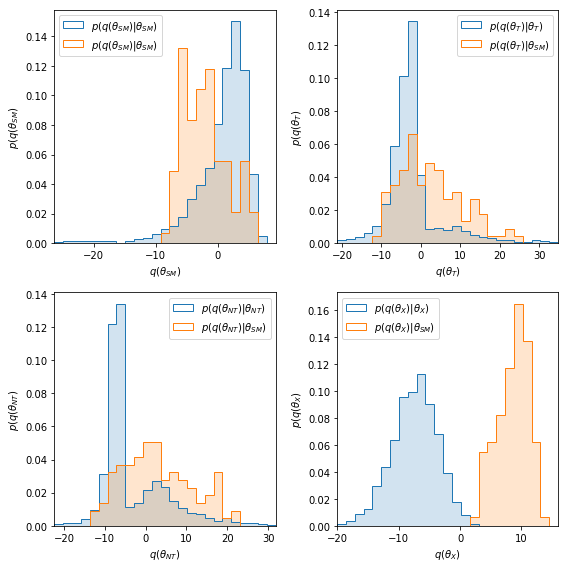

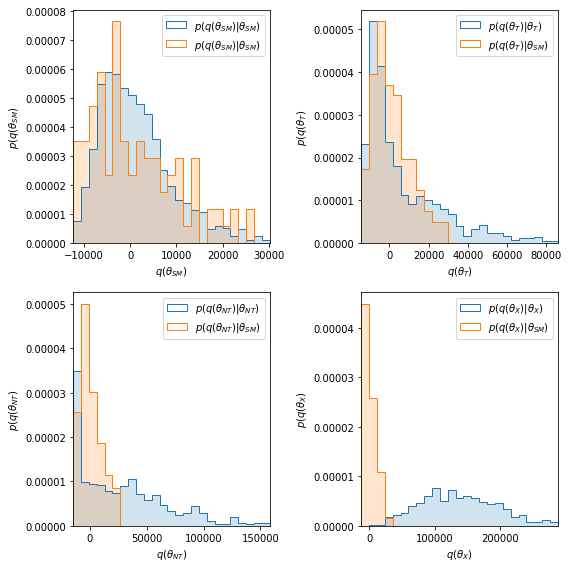

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


ValueError: range parameter must be finite.

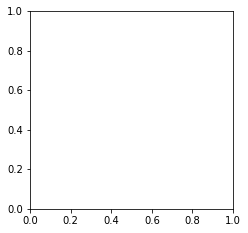

In [32]:
plot_neyman_distributions('carl', 'point_by_point')
plot_neyman_distributions('carl_calibrated', 'point_by_point')
plot_neyman_distributions('regression', 'point_by_point')

plot_neyman_distributions('carl', 'parameterized')
plot_neyman_distributions('carl_calibrated', 'parameterized')
plot_neyman_distributions('score', 'parameterized')
plot_neyman_distributions('score_calibrated', 'parameterized')
plot_neyman_distributions('combined', 'parameterized')
plot_neyman_distributions('combined_calibrated', 'parameterized')
plot_neyman_distributions('regression', 'parameterized')
plot_neyman_distributions('combinedregression', 'parameterized')

plot_neyman_distributions('scoreregression', 'score_regression')
plot_neyman_distributions('scoreregression_calibrated', 'score_regression')